# P1. Gradient descent

## Intro.
On charge les modules nécessaire pour faire fonctionner les différentes fonctions que l'on va utiliser.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

## Q1. Dataset

### Chargement du dataset

In [7]:
# Use this code to read from a CSV file.
import pandas as pd
U = pd.read_csv('data/space_ga.csv', delimiter=';')

In [8]:
U

ln(V/P)  Population  Education    Houses     Income           Xc  \
0    -0.661559    9.972920   9.246286  9.004054  12.134915  -86641472.0   
1    -0.650859   10.903347  10.221214  9.965758  13.056638  -87754736.0   
2    -0.617114    9.722205   8.753529  8.707648  11.630628  -85388993.0   
3    -0.639070    9.273691   8.183118  8.277412  11.243712  -87126855.0   
4    -0.700274   10.151519   9.207737  9.240676  12.155100  -86566214.0   
...        ...         ...        ...       ...        ...          ...   
3102 -0.821382   10.219611   9.693199  9.155884  12.822609 -108894093.0   
3103 -0.307581    8.866300   8.546946  7.633370  11.345323 -110573554.0   
3104 -0.699870    9.030974   8.522778  8.030410  11.491620 -110546505.0   
3105 -0.484777    8.752740   8.284504  7.767264  11.113924 -107684285.0   
3106 -0.489179    8.485496   7.961021  7.566311  10.864350 -104563095.0   

              Yc  
0     32542207.0  
1     30654881.0  
2     31863073.0  
3     32996943.0  
4     33979740.0  
...          ...  
3102  41657588.0  
3103  43922545.0  
3104  41285990.0  
3105  43907220.0  
3106  43835646.0  

[3107 rows x 7 columns]

In [9]:
class_names = list(U.columns)
Ay = U.to_numpy()

In [10]:
print(class_names)

[' ln(V/P)', 'Population', 'Education', 'Houses', 'Income', 'Xc', 'Yc']


In [11]:
# Shuffle
Ay = Ay[np.random.permutation(Ay.shape[0]),:]
# Separation features X / donnees y
A_full = Ay[:,1:];
y_full = MakeCol( Ay[:,0] )

Après avoir mélangé les données, séparation entre les données d'entraînement et les données de test (environ 70 / 30) avec $n = 3107$
* $n_{train} = 2170$
* $n_{test} = 957$

In [12]:
n_train = 2170
n_test = 937
A_train = A_full[:n_train, :]
A_test = A_full[n_train:,:]
y_train = y_full[:n_train,:]
y_test = y_full[n_train:,:]

A, A1, y, y1 = A_train, A_test, y_train, y_test

### Dimensions du problème

In [13]:
[n,p] = A_train.shape
print(n,p)

2170 6


avec $n = 2170$ samples et $p = 6$ features.

### Matrice de covariance
La matrice de covariance est définie ainsi :
$$C = A^T A$$

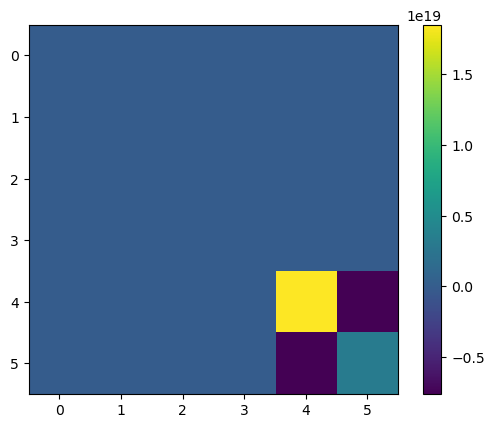

In [14]:
C = A.transpose().dot(A)

plt.imshow(C);
plt.colorbar()

On normalise les données afin de mieux les exploiter.

$$\hat{A}_{i,j} = \frac{A_{i,j} - E(A_{.,j})}{\sigma (A_{.,j})}$$

In [15]:
mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
A1 = (A1-mA)/sA

m = y.mean()
y = y-m
y1 = y1-m

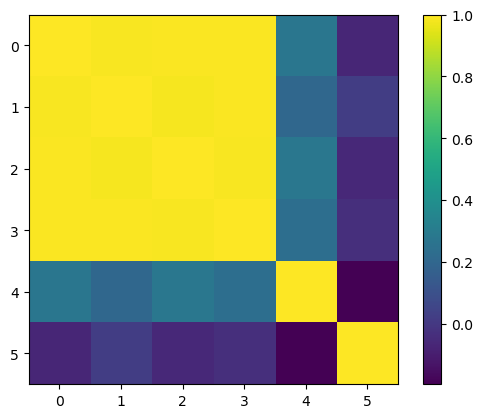

In [16]:
C = A.transpose().dot(A) / n

plt.imshow(C);
plt.colorbar()

## Q2. Gradient descent (l2 loss) with ridge penalty

On formule le problème ainsi :
$$\min_x f(x) = \frac{1}{2} ||Ax - y||^2 + \frac{\lambda}{2} ||x||^2$$
soit 
$$\nabla f(x) = A^T(Ax - y) + \lambda x$$

In [17]:
# ridge penalty
lmbda_pen = 1e-1

# 
def f(x): return 1/2*np.linalg.norm(A.dot(x)-y)**2 + lmbda_pen/2 * np.linalg.norm(x)**2
def Gradf(x): return A.transpose().dot(A.dot(x)-y) + lmbda_pen*x

On commence avec $x = 0$, puis à chaque fois :
$$x \leftarrow x - \tau \nabla f(x)$$

In [18]:
x = np.zeros((p,1))

In [19]:
tau = 1/np.linalg.norm(A,2)**2

C = A.transpose().dot(A)
tau_opt = 2 / ( np.linalg.norm(C,2) + np.linalg.norm(C,-2) )

tau_mult = [.1, .5, 1, 1.8, 1.98]

In [20]:
iter0 = 4000
exo0 = np.zeros((6, iter0))
x = np.zeros((p,1))
tau_mult = [.1, .5, 1, 1.8, 1.98, tau_opt]
for j in range(len(tau_mult)):
    tauj = tau_mult[j]
    x = np.zeros((p,1))
    for i in range(iter0):
        exo0[j,i] = f(x)
        x = x - tauj*(tau if j < 5 else 1)*Gradf(x)


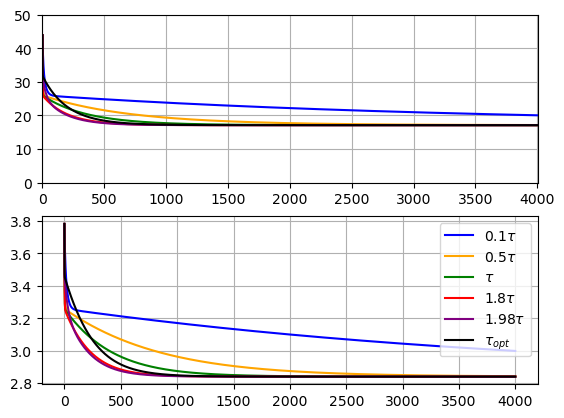

In [21]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.subplot(2,1,1)
plt.plot(alliter0, exo0[0,:], color='blue', label=r'$0.1 \tau$')
plt.plot(alliter0, exo0[1,:], color='orange', label=r'$0.5 \tau$')
plt.plot(alliter0, exo0[2,:], color='green', label=r'$\tau$')
plt.plot(alliter0, exo0[3,:], color='red', label=r'$1.8\tau$')
plt.plot(alliter0, exo0[4,:], color='purple', label=r'$1.98\tau$')
plt.plot(alliter0, exo0[5,:], color='black', label=r'$\tau_{opt}$')
plt.axis([-5, iter0+5, 0, 10*(np.max(exo0)//10 + 1)])
plt.grid()

plt.subplot(2,1,2)
plt.plot(alliter0, np.log(exo0[0,:]), color='blue', label=r'$0.1 \tau$')
plt.plot(alliter0, np.log(exo0[1,:]), color='orange', label=r'$0.5 \tau$')
plt.plot(alliter0, np.log(exo0[2,:]), color='green', label=r'$\tau$')
plt.plot(alliter0, np.log(exo0[3,:]), color='red', label=r'$1.8\tau$')
plt.plot(alliter0, np.log(exo0[4,:]), color='purple', label=r'$1.98\tau$')
plt.plot(alliter0, np.log(exo0[5,:]), color='black', label=r'$\tau_{opt}$')
plt.legend()
plt.grid()
plt.show()

## Q3. Optimal step size

In [22]:
iter0 = 2000
exo0 = np.zeros((6, iter0))
x = np.zeros((p,1))
tau_mult = [1.9, 1.97, 1.98, 1.99, 2, tau_opt]
for j in range(len(tau_mult)):
    tauj = tau_mult[j]
    x = np.zeros((p,1))
    for i in range(iter0):
        exo0[j,i] = f(x)
        x = x - tauj*(tau if j < 5 else 1)*Gradf(x)


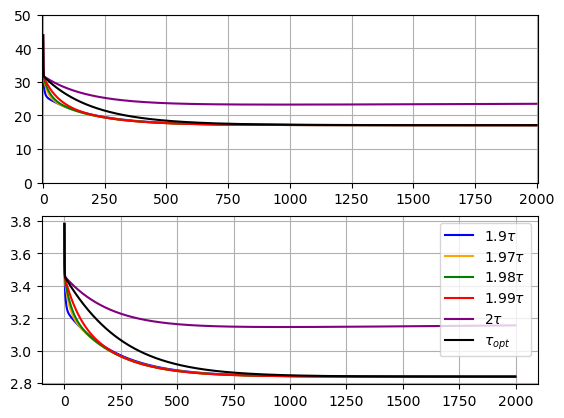

In [23]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.subplot(2,1,1)
plt.plot(alliter0, exo0[0,:], color='blue', label=r'$1.9 \tau$')
plt.plot(alliter0, exo0[1,:], color='orange', label=r'$1.97 \tau$')
plt.plot(alliter0, exo0[2,:], color='green', label=r'$1.98 \tau$')
plt.plot(alliter0, exo0[3,:], color='red', label=r'$1.99 \tau$')
plt.plot(alliter0, exo0[4,:], color='purple', label=r'$2\tau$')
plt.plot(alliter0, exo0[5,:], color='black', label=r'$\tau_{opt}$')
plt.axis([-5, iter0+5, 0, 10*(np.max(exo0)//10 + 1)])
plt.grid()

plt.subplot(2,1,2)
plt.plot(alliter0, np.log(exo0[0,:]), color='blue', label=r'$1.9 \tau$')
plt.plot(alliter0, np.log(exo0[1,:]), color='orange', label=r'$1.97 \tau$')
plt.plot(alliter0, np.log(exo0[2,:]), color='green', label=r'$1.98 \tau$')
plt.plot(alliter0, np.log(exo0[3,:]), color='red', label=r'$1.99 \tau$')
plt.plot(alliter0, np.log(exo0[4,:]), color='purple', label=r'$2\tau$')
plt.plot(alliter0, np.log(exo0[5,:]), color='black', label=r'$\tau_{opt}$')
plt.legend()
plt.grid()
plt.show()

In [24]:
print(1.8*tau)
print(1.9*tau)
print(1.99*tau)

0.00020463309130715982
0.0002160015963797798
0.0002262332509451378


In [25]:
tau_opt

0.0002271338948026701

## Q4. Optimal penalty for ridge

L'idée est de trouver la pénalité optimale sur les données de test.

In [44]:
tau_real = tau*1.9
iter1 = 1500
exo1 = np.zeros((6,iter1,2))
x = np.zeros((p, 1)) 

penalty_list = [7, 6, 5, 2, 1, 0.5]
for j in range(6):
    lmbda = penalty_list[j]
    def f_train(x): return 1/2*np.linalg.norm(A.dot(x)-y)**2 + lmbda/2 * np.linalg.norm(x)**2
    def Gradf(x): return A.transpose().dot(A.dot(x)-y) + lmbda*x
    def f_test(x) : return 1/2*np.linalg.norm(A1.dot(x)-y1)**2
    x = np.zeros((p,1))
    for i in range(iter1):
        exo1[j,i,0] = f_train(x)
        exo1[j,i,1] = f_test(x)
        x = x - tau_real*Gradf(x)
    

In [45]:
alliter1 = [i for i in range(iter1)]
plt.clf()
plt.subplot(3,1,1)
plt.plot(alliter1, exo1[0,:,0], color='blue', label=r'$\lambda = 1$')
plt.plot(alliter1, exo1[1,:,0], color='orange', label=r'$\lambda = 0.5$')
plt.plot(alliter1, exo1[2,:,0], color='green', label=r'$\lambda = 0.1$')
plt.plot(alliter1, exo1[3,:,0], color='red', label=r'$\lambda = 0.05$')
plt.plot(alliter1, exo1[4,:,0], color='purple', label=r'$\lambda = 0.01$')
plt.plot(alliter1, exo1[5,:,0], color='black', label=r'$\lambda = 0.005$')
plt.grid()

plt.subplot(3,1,2)
plt.plot(alliter1, exo1[0,:,1], color='blue', label=r'$\lambda = 1$')
plt.plot(alliter1, exo1[1,:,1], color='orange', label=r'$\lambda = 0.5$')
plt.plot(alliter1, exo1[2,:,1], color='green', label=r'$\lambda = 0.1$')
plt.plot(alliter1, exo1[3,:,1], color='red', label=r'$\lambda = 0.05$')
plt.plot(alliter1, exo1[4,:,1], color='purple', label=r'$\lambda = 0.01$')
plt.plot(alliter1, exo1[5,:,1], color='black', label=r'$\lambda = 0.005$')
plt.grid()

plt.subplot(3,1,3)
plt.plot(alliter1[1000:], exo1[0,1000:,1], color='blue', label=r'$\lambda = 1$')
plt.plot(alliter1[1000:], exo1[1,1000:,1], color='orange', label=r'$\lambda = 0.5$')
plt.plot(alliter1[1000:], exo1[2,1000:,1], color='green', label=r'$\lambda = 0.1$')
plt.plot(alliter1[1000:], exo1[3,1000:,1], color='red', label=r'$\lambda = 0.05$')
plt.plot(alliter1[1000:], exo1[4,1000:,1], color='purple', label=r'$\lambda = 0.01$')
plt.plot(alliter1[1000:], exo1[5,1000:,1], color='black', label=r'$\lambda = 0.005$')
plt.legend()
plt.grid()
plt.show()